# K-means clustering. Mall Customers 1

Organised logical groups of information is preferred over unorganised data by people. For example, anyone finds it easier to remember information when it is clustered together by taking its common characteristics into account.

Likewise, A machine learning technique that provides a way to find groups/clusters of different observations within a dataset is called Clustering. In this technique due to the absence of response variable, it is considered to be an unsupervised method. This implies that the relationships between 'n' number of observations is found without being trained by a response variable. The few applications of Clustering analysis are 
1. Customer segmentation: process for dividing customers into groups based on similar characteristics.
2. Stock Market Clustering based on the performance of the stocks
3. Reducing Dimensionality

There are two most common Clustering algorithm that is used:
1. KMeans Clustering: commonly used when we have large dataset
2. Heirarchical Clustering: commonly used when we have small dataset

Out of the two, KMeans Clustering is the simplest technique that aims to split the dataset into K groups/clusters. It is relatively fast compared to heirarchichal clustering. It works on the following algorithm:
1. Random selection of k points which are also known as centroid. These centroids should be as far as possible from each other and the placement of these centroids critically impact the results.
2. Calculation of euclidean distance between each centroid and each point in the data space.
3. A point is assigned to a particular centroid based on the shortest distance. Once assigned, this can be considered as early groups.
4. Now, Recalculation of new centroids (also known as recalibrated centres) takes place based on the points within the groups.
5. Steps 2, 3, 4 are repeated until the centres/centroids can't move any further. This is when the algorithm stops.

This recipe demonstrates KMeans Clustering using a real-life Mall dataset to carry out customer segmentation in R-language after finding the optimal number of clusters.

## STEP 1: Importing Necessary Libraries

In [3]:
# install.packages("factoextra")
# install.packages("NbClust")

In [4]:
library(cluster)
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## STEP 2: Loading the Dataset

In [5]:
# creating a dataframe customer_seg
customer_seg = read.csv('data/Mall_Customers.csv')

# getting the required information about the dataset
summary(customer_seg)

   CustomerID        Gender               Age        Annual.Income..k..
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

**Dataset description**: It is a basic data about the customers going to the supermarket mall. This can be used for customer segmentation. There are 200 observations(customers) and no missing data.

It consists of four columns ie. measured attrutes:
1. CustomerID is the customer identification number.
2. Gender is Female and Male.
3. Age is the age of customers.
4. Annual Income (k) is the annual income of clients in thousands of dollars.
5. Spending Score (1-100) is the spending score assigned by the shopping center according to the customer's purchasing behavior

For the simplicity of demonstrating K-Means Clustering with visualisation, we will only consider two measured attributes (Age and Annual Income).

In [6]:
# assigning columns 3 and 4 to a new dataset customer_prep
customer_prep = customer_seg[3:4]
summary(customer_prep)

      Age        Annual.Income..k..
 Min.   :18.00   Min.   : 15.00    
 1st Qu.:28.75   1st Qu.: 41.50    
 Median :36.00   Median : 61.50    
 Mean   :38.85   Mean   : 60.56    
 3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :70.00   Max.   :137.00    

## STEP 3: Data Preprocessing (Scaling)

This is a pre-modelling step. In this step, the data must be scaled or standardised so that different attributes can be comparable. Standardised data has mean zero and standard deviation one. we do thiis using scale() function

**Note:** Scaling is an important pre-modelling step which has  to be mandatory 

In [7]:
# scaling the dataset
customer_prep = scale(customer_prep)
head(customer_prep)

Age,Annual.Income..k..
-1.4210029,-1.734646
-1.2778288,-1.734646
-1.3494159,-1.696572
-1.1346547,-1.696572
-0.5619583,-1.658498
-1.2062418,-1.658498


## Step 4: Finding optimal number of clusters

Before we carry out the clustering, we need to find the optimal number of clusters for the above dataset. There are three methods to do so:
1. Elbow method
2. Silhoutte Method
3. Gap Statistic

We will use the Silhoutte Method to do so using silhoutte scores. Average Silhoutte scores measures the quality of clustering. The higher the score, the better the clustering.  We will use fviz_nbclust(x, FUNcluster , method = ) function where:
1. x = dataframe
2. FUNcluster = a partioning function. for eg. kmeans, hcut (for heirarchical clustering
3. method = the method to be used to determine the optimal cluster

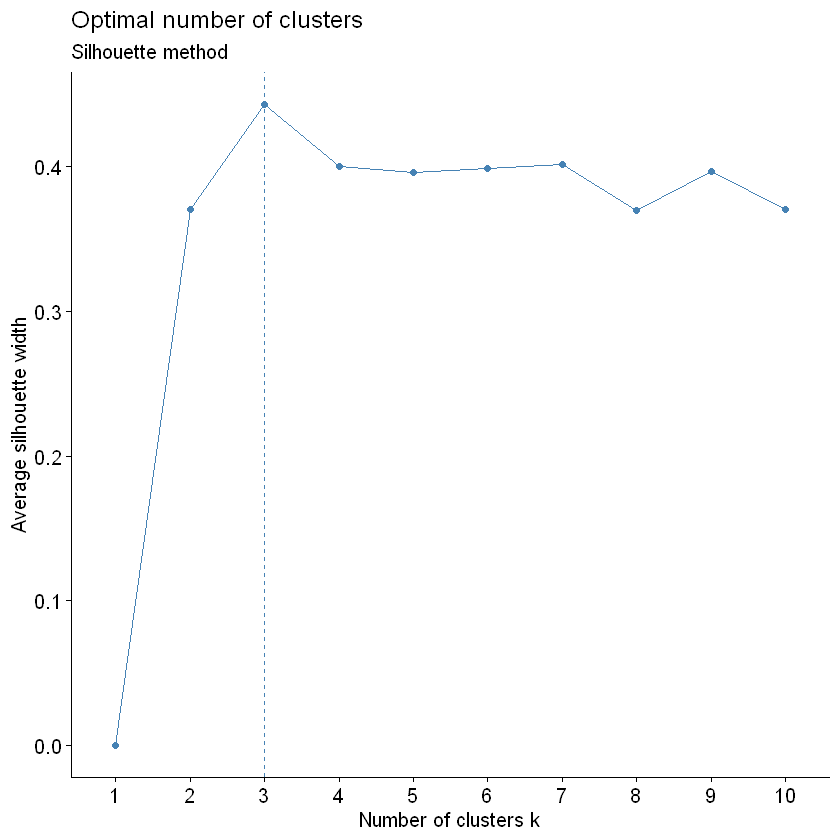

In [13]:
# elbow = wss
# try few methods
factoextra::fviz_nbclust(customer_prep, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")

Note: According to the average silhouette, the optimal number of clusters are 3. 

## STEP 5: Performing K-Means Algorithm

We will use kmeans() function in cluster library in R to perform this.
The two arguements used below are:
1. x = dataset being used (mandatory input)
2. centers = number of clusters (k) (mandatory input). We will use 3 in this case based on the optimal number of clusters

In [14]:
# This is an assignment of random state
set.seed(2022)

# creation of an object km which store the output of the function kmeans
km = kmeans(x = customer_prep, centers = 3)
km

K-means clustering with 3 clusters of sizes 76, 62, 62

Cluster means:
         Age Annual.Income..k..
1 -0.2784359          0.9660948
2 -0.8725537         -0.8288562
3  1.2138623         -0.3553890

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 3 2 3 2 3 2 2 2 2 2 3 2 2 2 3 2 3 2 3 2 2 2 3 2 3 2 3 2 2
 [38] 2 2 2 3 2 3 2 3 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 [75] 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 1 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
[112] 2 1 2 2 2 3 3 3 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 51.66597 38.32968 42.19537
 (between_SS / total_SS =  66.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

The most important components to note from the output of kmeans() function are:

1. Cluster (Access line of code: km$clusters) : It is the vector of integers indicating the assignment of each observation to a particular cluster

2. Totss (Access line of code: km$totts): returns the total sum of squares

3. Centers (Access line of code: km$centers): returns the matrix of centers

4. withinss (Access line of code: km$withinss): returns the within-cluster sum of squares

5. tot.withinss (Access line of code: km$tot.withinss): returns the total within-cluster sum of squares

6. size (Access line of code: km$size): returns the number of points in each cluster.

## Step 6: Data Visualation using scatter plot with clusters

We use clusplot() function in cluster library to plot the clusters formed w.r.t Age and Income

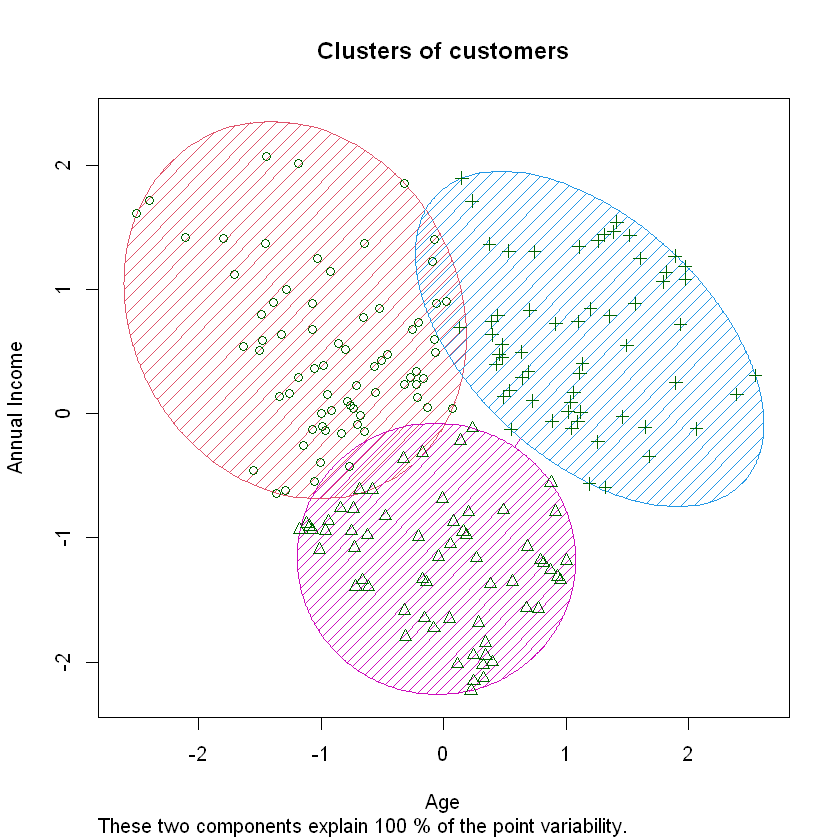

In [15]:
# contains the vector of integers indicating the assignment of each observation to a particular cluster
k_means = km$cluster

# using clusplot() function with various arguements to plot the clusters
clusplot(customer_prep, k_means, shade = TRUE, color = TRUE, span = TRUE,
         main = paste('Clusters of customers'), 
         xlab = 'Age',
         ylab = 'Annual Income')

This plot helps us to analyse the different clusters of customers formed so that we can target the respective clusters seperately in our marketing strategy.